<a href="https://colab.research.google.com/github/sunanda-debnath/Walmart-store-s-sales-forecasting/blob/main/Walmart_store%E2%80%99s_sales_forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

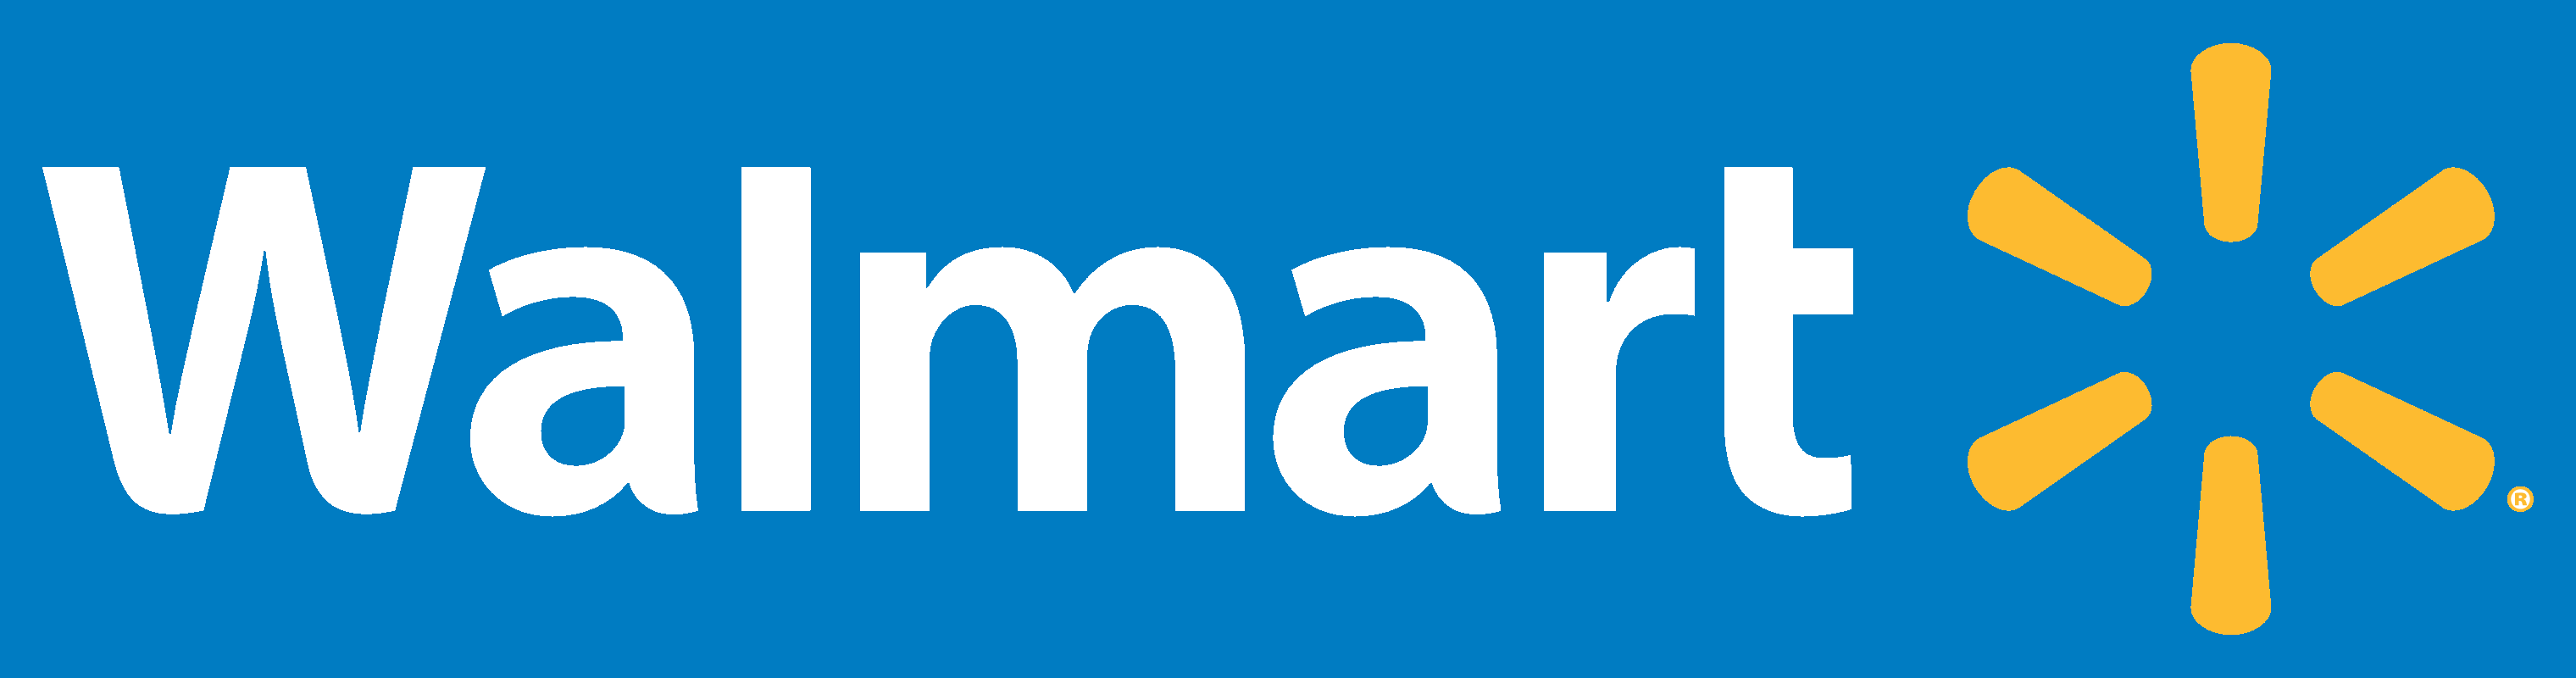

## Description:
###One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

### Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## **This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:**



*   Store - the store number
*   Date - the week of sales
*   Weekly_Sales - sales for the given store
*   Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region
*   CPI – Prevailing consumer price index
*   Unemployment - Prevailing unemployment rate
*   Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


#**1.   Exploring the dataset**




In [1]:
#import libreries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR

In [2]:
#import dataset
df=pd.read_csv('/content/drive/MyDrive/skillvertex/major project/Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

the dataset have 8 column and 6435 rows

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

there is no null value present in the dataset

In [7]:
#Reframing date column to numeric form for relevance
df.Date = pd.to_datetime(df.Date)

df['day'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(columns =['Date'], inplace=True) 

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df =df.copy(deep =True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [8]:
#cheaking datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   day           6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [9]:
df.nunique().sort_values()

Holiday_Flag       2
year               3
day                7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [10]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


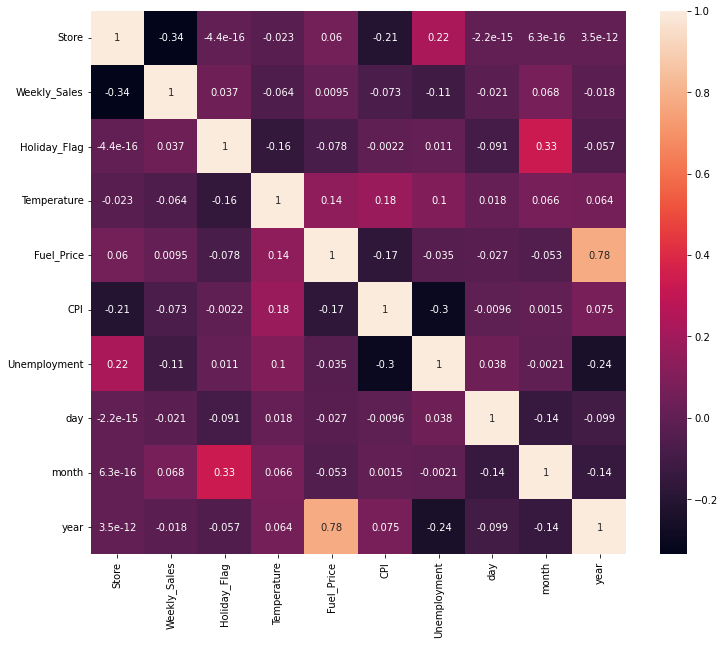

In [11]:
#features correlation cheak
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)


There is not much of correlation between the weekly sales and other columns.so we didnot drop any.

The statistics seem to be fine,lets do further analysis on the dataset.

# **2.EDA**

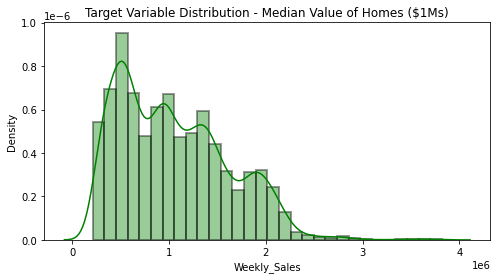

In [12]:
#analyse the target variable
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

target variable seems to be normally distributed,avarage is arround 20 units.

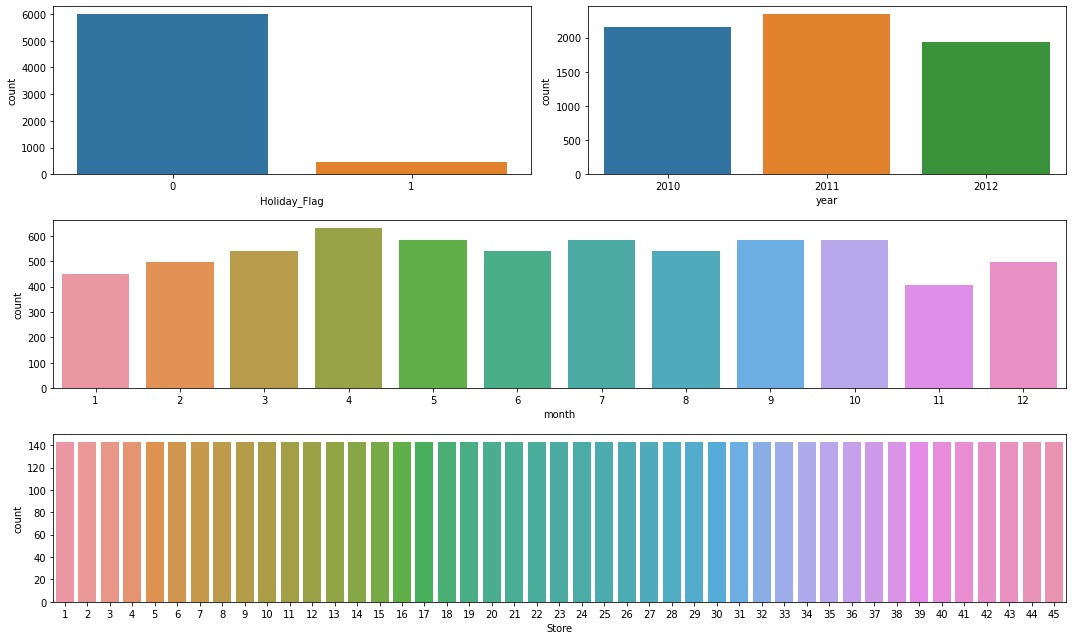

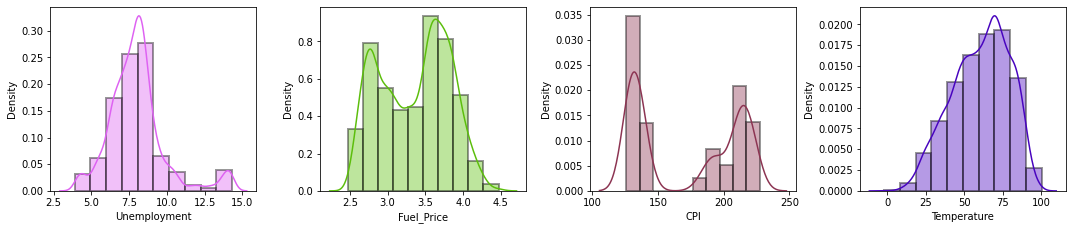

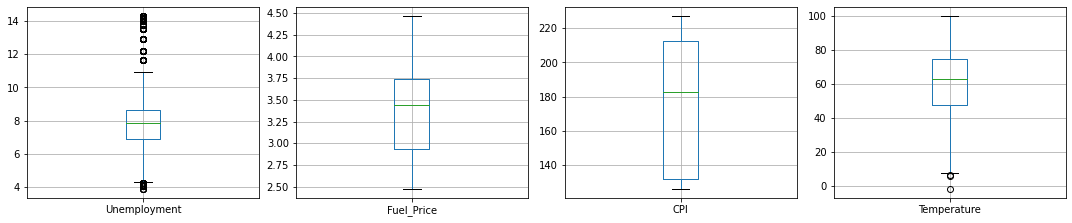

In [13]:
#Visualising the categorical features 

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

There is no catagorical features in this data set.

There seem to be some outliers on the features.in upcoming section we are going to fix this.

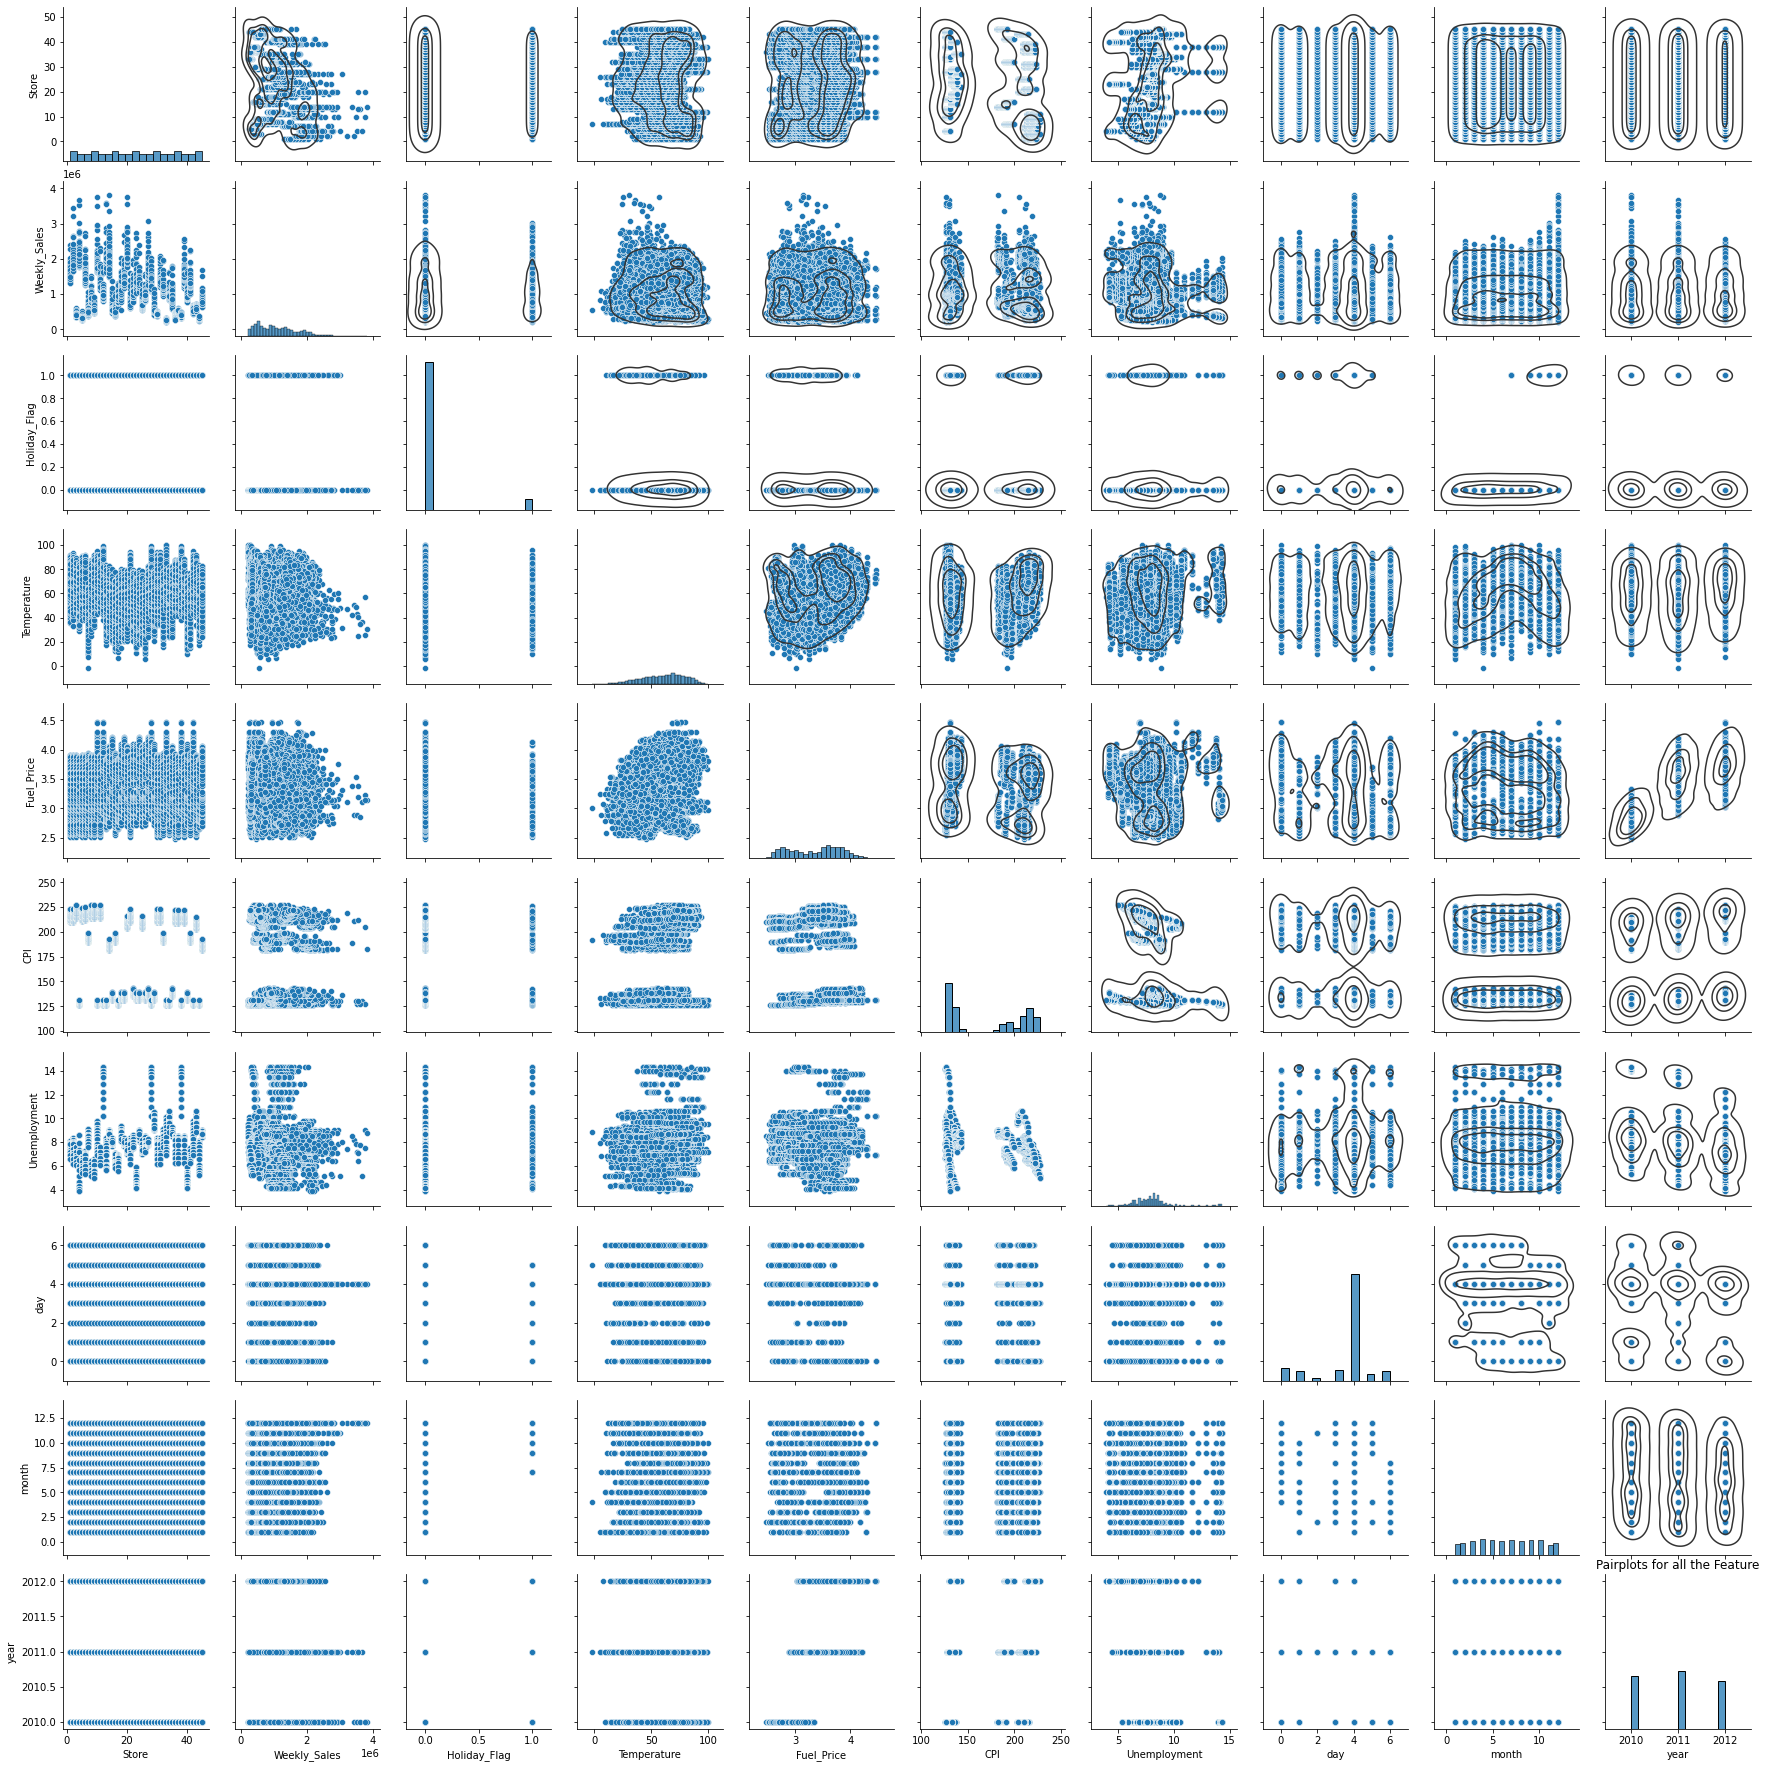

In [14]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

# **3.Data preprocessing**

In [15]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [16]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
day                           0         0.0
month                         0         0.0
year                          0         0.0


The datset doesn't have any inconsistant values.

In [17]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
day
month
Store


(6435, 69)

In [18]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mOutput:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,day_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Output:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


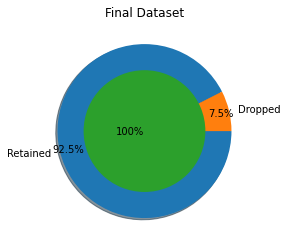


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [19]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.70)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# **4. Data Manipulation**

In [20]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (5953, 68) (5953,) 
Training set  --->  (4464, 68) (4464,) 
Testing set   --->  (1489, 68)  (1489,)


In [21]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
x_train_std = std.fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std, columns=X.columns)
display(x_train_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
x_test_std = std.transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=X.columns)
display(x_test_std.describe())

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,day_2,day_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,...,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03
mean,-6.366870e-18,-4.090714e-16,4.361306e-16,2.300032e-16,3.589323e-16,1.114202e-17,5.571012e-17,-7.441280e-17,4.934325e-17,3.342607e-17,...,-8.754447e-18,-1.910061e-17,2.785506e-18,3.859915e-17,3.143642e-17,-7.361694e-17,2.069233e-17,3.103849e-17,1.750889e-17,-3.263021e-17
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,...,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-2.731792e-01,-2.987593e+00,-1.912063e+00,-1.262356e+00,-2.731101e+00,-7.635304e-01,-6.528385e-01,-2.537276e-01,-1.234409e-01,-2.727054e-01,...,-1.596861e-01,-1.506002e-01,-5.191741e-02,-1.654926e-01,-1.333561e-01,-1.589469e-01,-1.552034e-01,-1.604222e-01,-1.559586e-01,-1.529175e-01
25%,-2.731792e-01,-7.366912e-01,-9.759856e-01,-1.089148e+00,-6.591525e-01,-7.635304e-01,-6.528385e-01,-2.537276e-01,-1.234409e-01,-2.727054e-01,...,-1.596861e-01,-1.506002e-01,-5.191741e-02,-1.654926e-01,-1.333561e-01,-1.589469e-01,-1.552034e-01,-1.604222e-01,-1.559586e-01,-1.529175e-01
50%,-2.731792e-01,1.193890e-01,1.836980e-01,3.824181e-01,1.052947e-01,-7.635304e-01,-6.528385e-01,-2.537276e-01,-1.234409e-01,-2.727054e-01,...,-1.596861e-01,-1.506002e-01,-5.191741e-02,-1.654926e-01,-1.333561e-01,-1.589469e-01,-1.552034e-01,-1.604222e-01,-1.559586e-01,-1.529175e-01
75%,-2.731792e-01,7.702603e-01,8.243739e-01,9.887703e-01,6.266910e-01,1.309705e+00,1.531772e+00,-2.537276e-01,-1.234409e-01,-2.727054e-01,...,-1.596861e-01,-1.506002e-01,-5.191741e-02,-1.654926e-01,-1.333561e-01,-1.589469e-01,-1.552034e-01,-1.604222e-01,-1.559586e-01,-1.529175e-01
max,3.660601e+00,2.157869e+00,2.463605e+00,1.326790e+00,2.577515e+00,1.309705e+00,1.531772e+00,3.941235e+00,8.101041e+00,3.666961e+00,...,6.262285e+00,6.640099e+00,1.926136e+01,6.042566e+00,7.498718e+00,6.291408e+00,6.443158e+00,6.233550e+00,6.411958e+00,6.539473e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,day_2,day_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,...,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,0.012145,-0.027562,-0.041675,-0.048068,0.024552,-0.013044,-0.036629,0.044906,-0.029542,0.015692,...,-0.021672,0.050065,0.012936,-0.065430,-0.020592,-0.015991,0.013190,-0.027304,0.007247,0.031359
std,1.020634,1.014238,1.010131,0.994651,0.986541,0.996681,0.983419,1.079054,0.874054,1.026511,...,0.931589,1.150339,1.117658,0.782044,0.921128,0.949888,1.040909,0.913233,1.022735,1.095491
min,-0.273179,-2.731762,-1.819990,-1.262356,-2.731101,-0.763530,-0.652838,-0.253728,-0.123441,-0.272705,...,-0.159686,-0.150600,-0.051917,-0.165493,-0.133356,-0.158947,-0.155203,-0.160422,-0.155959,-0.152918
25%,-0.273179,-0.763499,-1.041752,-1.094317,-0.647120,-0.763530,-0.652838,-0.253728,-0.123441,-0.272705,...,-0.159686,-0.150600,-0.051917,-0.165493,-0.133356,-0.158947,-0.155203,-0.160422,-0.155959,-0.152918
50%,-0.273179,0.079109,0.122316,0.360205,0.114920,-0.763530,-0.652838,-0.253728,-0.123441,-0.272705,...,-0.159686,-0.150600,-0.051917,-0.165493,-0.133356,-0.158947,-0.155203,-0.160422,-0.155959,-0.152918
75%,-0.273179,0.790536,0.817249,0.945085,0.626691,1.309705,1.531772,-0.253728,-0.123441,-0.272705,...,-0.159686,-0.150600,-0.051917,-0.165493,-0.133356,-0.158947,-0.155203,-0.160422,-0.155959,-0.152918
max,3.660601,2.161680,2.463605,1.320508,2.577515,1.309705,1.531772,3.941235,8.101041,3.666961,...,6.262285,6.640099,19.261360,6.042566,7.498718,6.291408,6.443158,6.233550,6.411958,6.539473


# **5. Feature Selection/Extraction**

                                       Correlation Matrix                                       


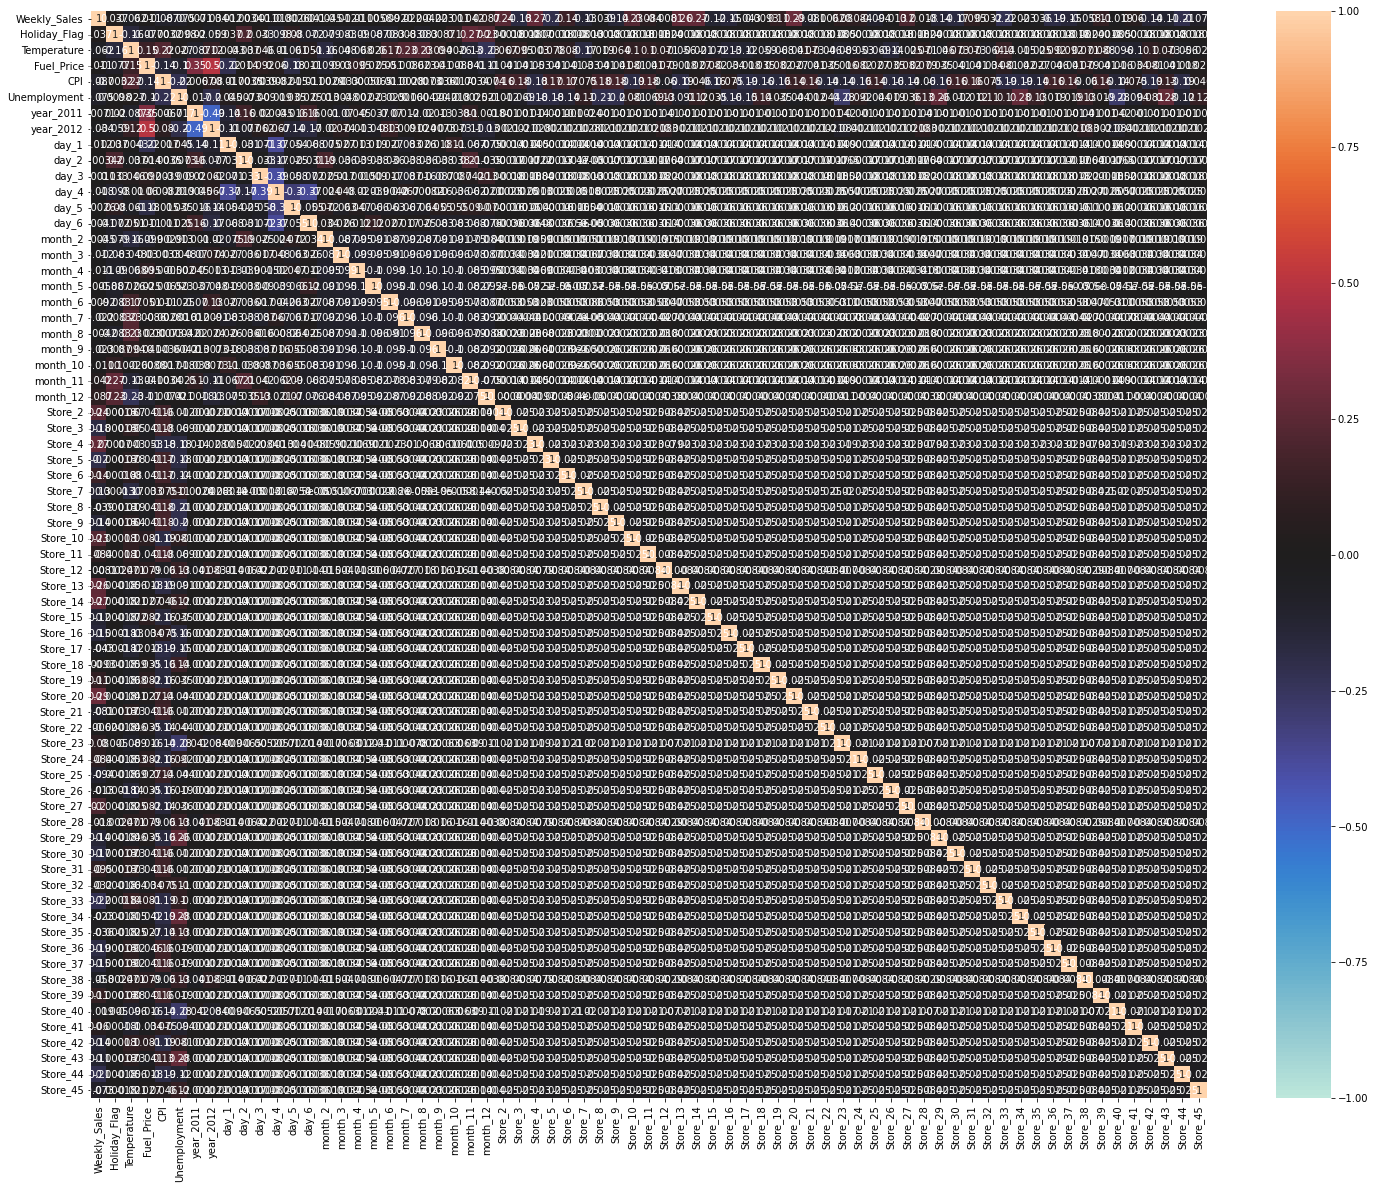

In [22]:
#Checking the correlation
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

we got some high multicorrelation between the features.

Dropped Features -->  ['CPI', 'Unemployment', 'Fuel_Price', 'day_4', 'month_7', 'Store_17', 'Temperature', 'year_2012', 'Store_6', 'month_12', 'month_2', 'Store_39', 'Store_20', 'month_11', 'month_5', 'Store_16', 'Store_8', 'Store_11', 'month_10', 'year_2011', 'Holiday_Flag', 'Store_21', 'Store_22', 'month_9', 'Store_45', 'Store_19', 'Store_9', 'Store_44', 'Store_43', 'month_8', 'Store_42', 'Store_41', 'Store_18', 'Store_15', 'Store_7', 'Store_36', 'month_3', 'day_1', 'Store_24', 'Store_40', 'Store_5', 'Store_10', 'Store_25', 'month_6', 'day_2', 'day_3', 'day_5', 'Store_27', 'Store_34', 'Store_26', 'Store_33', 'Store_23', 'Store_2', 'Store_3', 'Store_13', 'Store_35']


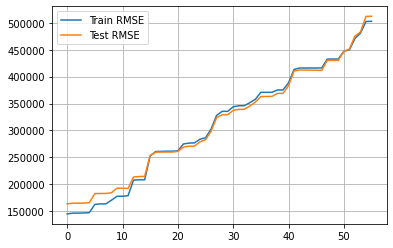

In [32]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]


DROP=[];b=[]

for i in range(len(x_train_std.columns)):
    vif = pd.DataFrame()
    X = x_train_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(x_train_std.drop(DROP,axis=1), y_train)

        pred1 = LR.predict(x_train_std.drop(DROP,axis=1))
        pred2 = LR.predict(x_test_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

In [46]:
def train_eval(model, x_train, x_test, y_train, y_test):
    
    model.fit(x_train,y_train)
    prd = model.predict(x_test)
    print('R2_score',r2_score(y_test, prd))
    print('MAE',     mean_absolute_error(y_test, prd))
    print('MSE',     (mean_squared_error(y_test, prd))**(0.5))
    
    return model

# **6. Predictive Modelling**

### **Linear Regression**

In [58]:
lr = train_eval(LinearRegression(), x_train, x_test, y_train, y_test)

R2_score 0.9233403629914926
MAE 95311.97309934665
MSE 163208.08486165336


In [59]:
RR = train_eval(Ridge(), x_train, x_test, y_train, y_test)

R2_score 0.9222101017449452
MAE 95004.44253902863
MSE 164406.84345395045


In [60]:
LLR = train_eval(Lasso(), x_train, x_test, y_train, y_test)

R2_score 0.9234089442573419
MAE 94987.57340664147
MSE 163135.06389528204


In [61]:
ENR = train_eval(ElasticNet(), x_train, x_test, y_train, y_test)

R2_score 0.10088428141270767
MAE 467382.69624197524
MSE 558941.150471781


### **Support vector machine**

In [62]:
svm = train_eval(SVR(), x_train, x_test, y_train, y_test)

R2_score -0.02972505548591564
MAE 485985.55549031094
MSE 598162.1512025938


### **Decision Tree Regression**

In [63]:
dt = train_eval(DecisionTreeRegressor(), x_train, x_test, y_train, y_test)

R2_score 0.8840997384335104
MAE 98122.7773539288
MSE 200678.33886564957


# **7.Evaluation matrix**

In [82]:
# Regression Models Results Evaluation
'''
accuracy_list = ['MSE','RMSE',"R2",]
reg_models = [lr,RR,LLR,ENR,svm,dt]





comparision_df = pd.DataFrame(index = accuracy_list)
comparision_df['Linear Regression'] = error_matrix(lr)
comparision_df['Lasso'] = error_matrix(LLR)
comparision_df['Ridge'] = error_matrix(RR)
comparision_df['ElasticNet'] = error_matrix(ENR)
comparision_df['Support vector machine'] = error_matrix(svm)
comparision_df['Decision tree regressior'] = error_matrix(dt)
comparision_df
'''
ind=['Linear Regression','Lasso','Ridge','ElasticNet','Support vector machine','Decision tree regressior']
data={'R2_score':[0.9233403629914926,0.9222101017449452,0.9234089442573419,0.10088428141270767,-0.02972505548591564,0.8840997384335104],'MAE':[95311.97309934665,95004.44253902863,94987.57340664147,467382.69624197524,485985.55549031094,98122.7773539288],'MSE':[163208.08486165336,164406.84345395045,163135.06389528204,558941.150471781,598162.1512025938,200678.33886564957]}
result=pd.DataFrame(data=data,index=ind)
result

,R2_score,MAE,MSE
Linear Regression,0.923340,95311.973099,163208.084862
Lasso,0.922210,95004.442539,164406.843454
Ridge,0.923409,94987.573407,163135.063895
ElasticNet,0.100884,467382.696242,558941.150472
Support vector machine,-0.029725,485985.555490,598162.151203
Decision tree regressior,0.884100,98122.777354,200678.338866
